In [1]:
# twitter followers by team
from utils import team_accounts, team_colors, set_size
from config import api_key, api_key_secret, access_token, access_token_secret
import tweepy as tw
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
from_saved = True

In [5]:
if from_saved:
    df = pd.read_csv('data/team_account_followers.csv')
else:
    auth = tw.OAuthHandler(api_key, api_key_secret) 
    auth.set_access_token(access_token, access_token_secret)
    api = tw.API(auth)
    d = {
        'team': [],
        'followers': []
    }
    for team in tqdm(team_accounts):
        account = team_accounts[team]
        user = api.get_user(screen_name = account)
        d['team'].append(team)
        d['followers'].append(user.followers_count)
    df = pd.DataFrame(d)
    df.to_csv('data/team_account_followers.csv', index=False)

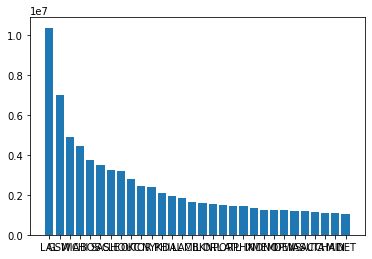

In [14]:
df.sort_values(by='followers', ascending=False, inplace=True)
plt.bar(df['team'], df['followers'])
plt.show()

In [55]:
ymin = min(df['followers'])*.95
ymax = max(df['followers'])*1.05
xmin = -1
xmax = len(df['team'])
sub_yadjust = 0.995

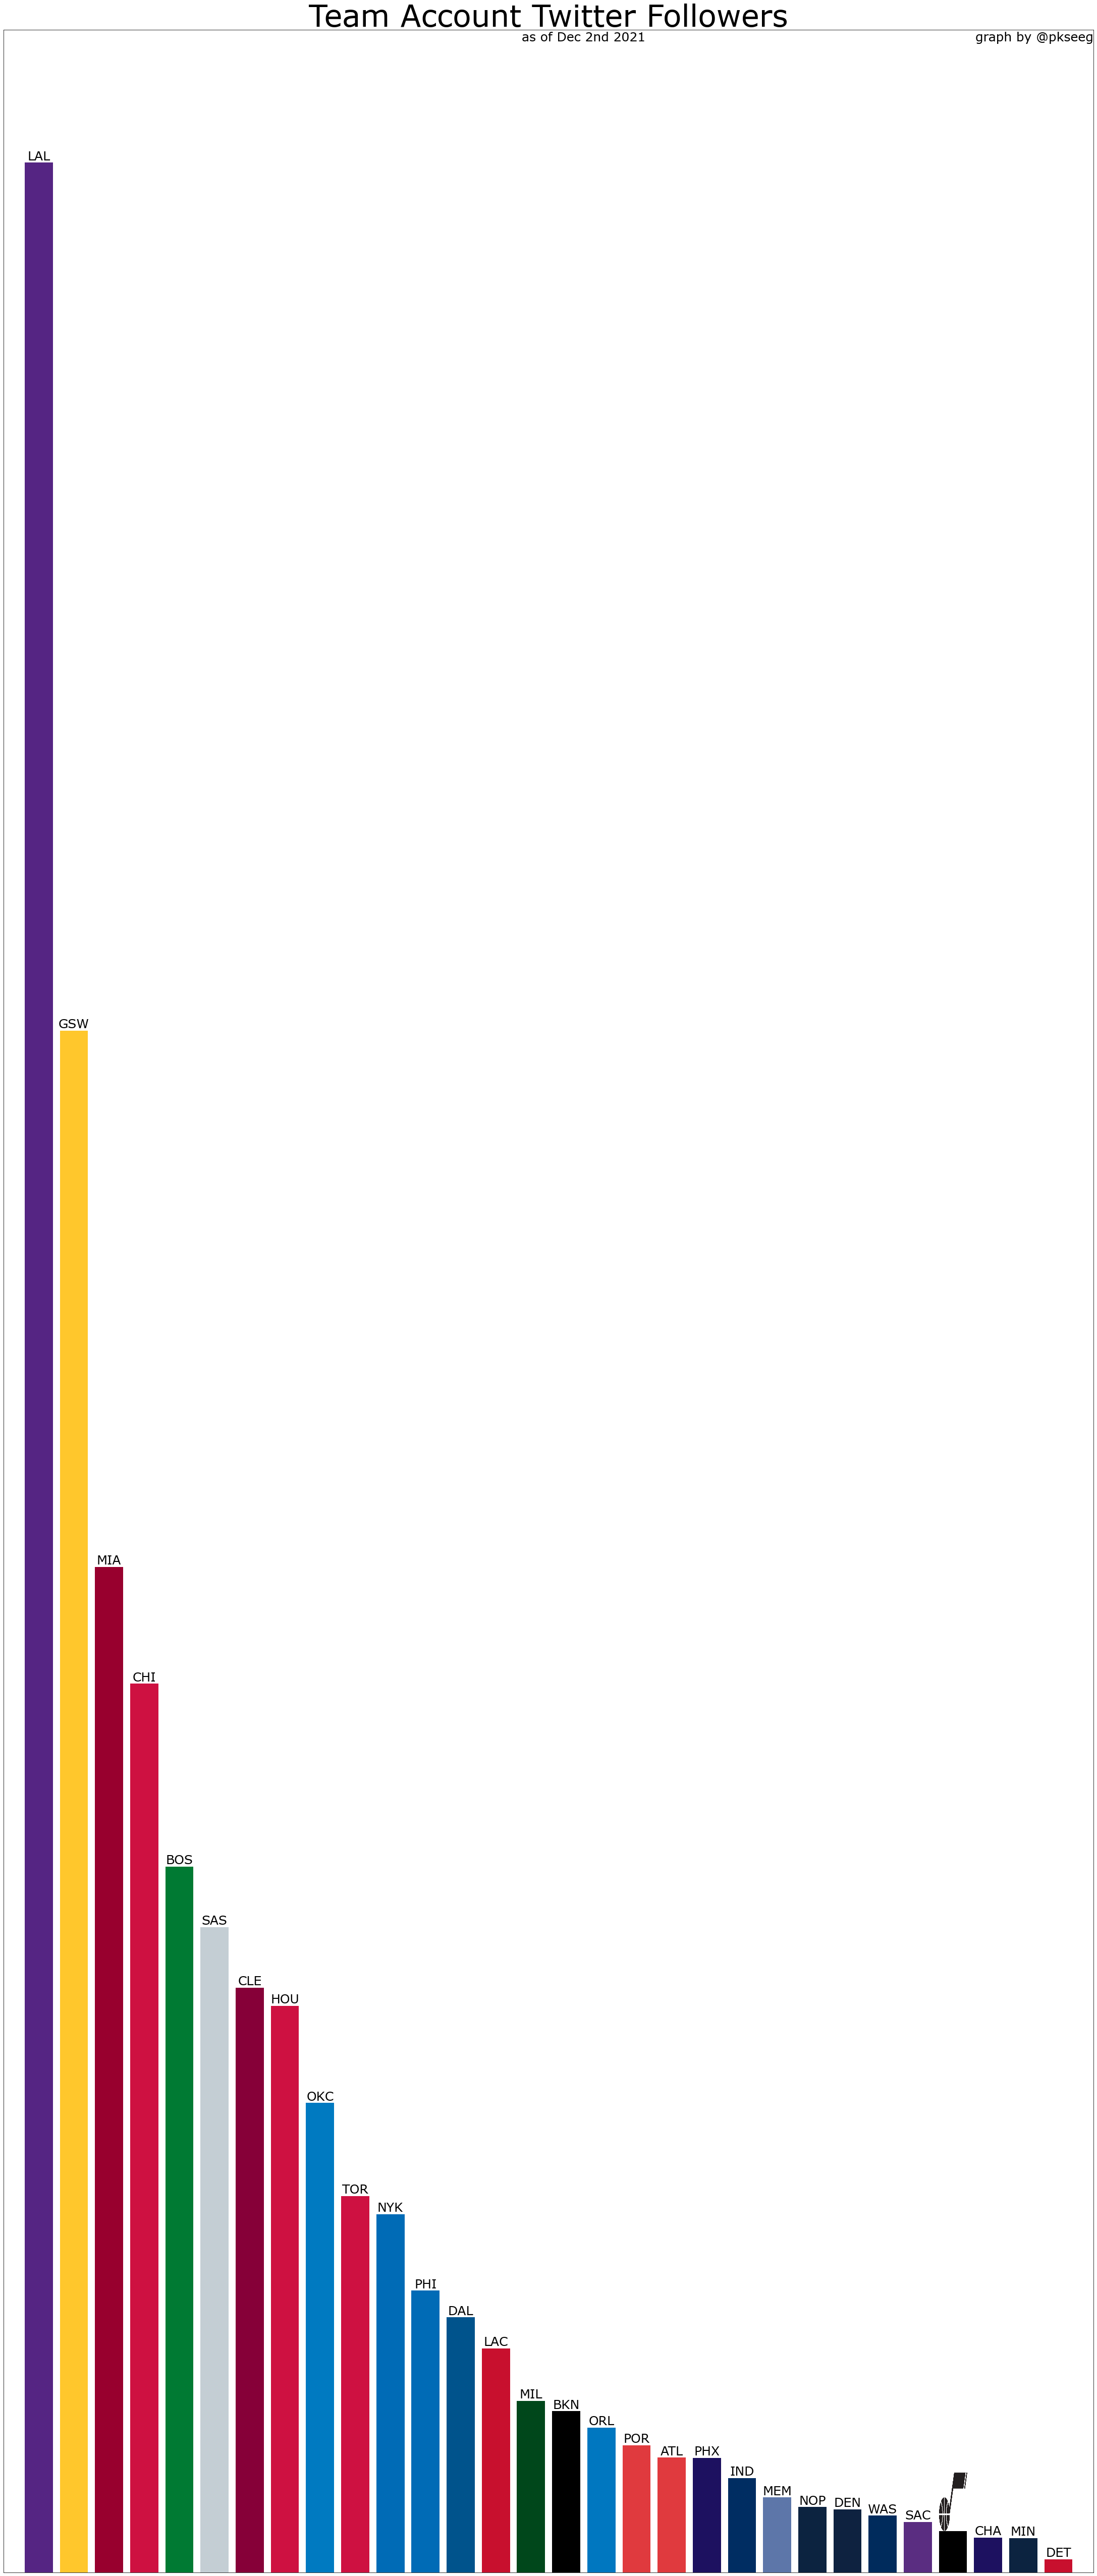

In [73]:
uta_logo = Image.open('media/utah_logo.png')
def get_img_loc(x, h, w):
    return x, (x+w), (h+w), h*1.2

colors = [team_colors[n] for n in df['team']]
titlefont = {'fontname':'Verdana',
            'fontsize': 60}
subfont = {'fontname':'Verdana',
            'fontsize': 25}
fig, ax = plt.subplots()
set_size(30,70)
bars = ax.bar(df['team'], 
              df['followers'],  
              color=colors)
for bar, name in zip(bars, df['team']):
    height = bar.get_height()
    if name=='UTA':
        ax.imshow(uta_logo, 
                  extent=get_img_loc(bar.get_x(),height,bar.get_width()),
                  aspect='auto')
    else:
        ax.text(bar.get_x() + bar.get_width() / 2.0, 
                 height, 
                 name, 
                 ha='center', 
                 va='bottom',
                 **subfont)
ax.tick_params(which='both',      
               bottom=False,        
               labelbottom=False,
               left=False,
               labelleft=False)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin,xmax)
ax.set_title('Team Account Twitter Followers',**titlefont)
ax.text((xmax-xmin)/2, 
        ymax*sub_yadjust,
        'as of Dec 2nd 2021',
        ha='center', 
        va='bottom',
        **subfont)
ax.text(xmax, 
        ymax*sub_yadjust,
        'graph by @pkseeg',
        ha='right', 
        va='bottom',
        **subfont)
set_size(30,70)
plt.savefig('figures/team_account_followers.png', bbox_inches='tight', facecolor='#FFFFFF')
plt.show()

17322478

In [67]:
all_teams = set(df['team'])
all_but = all_teams.difference({'LAL','GS'})
print(df[df['team']=='LAL']['followers'].values[0] + df[df['team']=='GSW']['followers'].values[0]) 
sum(df[df['team'].isin(all_but)]['followers'].values)

17322478


64225812

In [71]:
df[df['team']=='LAL']['followers'].values[0] > df[df['team']=='MIA']['followers'].values[0]*2



True